In [218]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 3]
plt.rcParams['figure.dpi'] = 100
plt.style.use('seaborn-notebook')

# Equações Diferenciais Ordinárias

* Problema de Valor Inicial (PVI)
* Biblioteca `scipy.integrate.solve_ivp`
* Sistemas de EDO's
* Implementação de métodos numéricos: Euler, ponto médio, Runge-Kutta
* Exemplos
* Problema de Valor de Contorno (PVC)

# Introdução

Nesta seção iremos aprender a resolver **Equações Diferenciais Ordinárias** (EDO's) utilizando métodos numericos.

Lembre-se que uma equação diferencial pode ser classificada quanto ao seu **tipo**, **ordem** e **linearidade**:

* **Tipo**: Pode ser do tipo ordinária (possui apenas 1 variável independente) ou parcial (possui mais de 1 variável independente)

Exemplo de equação diferencial ordinária:
\begin{equation}
\dfrac{dN}{dt} = k\cdot N (1 - N/r)
\end{equation}

Exemplo de equação diferencial parcial:
\begin{equation}
\dfrac{\partial u(t,x)}{\partial t} = c^2 \dfrac{\partial^2 u(t,x)}{\partial x^2}
\end{equation}

* **Ordem**: Podem ser de 1ª,  2ª, .. n-ésima ordem, dependendo da derivada de maior ordem presente na equação:
Exemplo de equação diferencial ordinária de 1º ordem:
\begin{equation}
\dfrac{dN}{dt} = k\cdot N (1 - N/r)
\end{equation}

Exemplo de equação diferencial ordinária de 2º ordem:
\begin{equation}
\dfrac{d^2y}{dt^2} = 0
\end{equation}

Exemplo de equação diferencial parcial de 2º ordem:
\begin{equation}
\dfrac{\partial^2 u}{\partial x^2} + 5\dfrac{\partial^2 u}{\partial y} + 3u = 0
\end{equation}

* **Linearidade**: Linear, se puder ser escrita como uma combinação linear das derivadas, ou não-linear, caso contrário.

Exemplo de equação diferencial ordinária de 1º ordem linear:
\begin{equation}
\dfrac{dQ(t)}{dt} = q\left(c - \dfrac{Q(t)}{V}\right)
\end{equation}

Exemplo de equação diferencial ordinária de 2º ordem linear:
\begin{equation}
\ddot{u} + 2\xi \omega_0 \dot{u} + \omega_0^2 u = 0
\end{equation}

Exemplo de equação diferencial ordinária de 1º ordem não-linear:
\begin{equation}
x' + p(t)x = q(t)x^n
\end{equation}

que, embora seja não-linear, é possível realizar a transformação $z = x^{1-n}$ e transformá-la em uma EDO linear.

Ou seja, dizemos que uma EDO é linear se é possível escrevê-la no formato:

\begin{equation}
a_n(t)\dfrac{d^ny}{dt^n} + a_{n-1}(t)\dfrac{d^{(n-1)}y}{dt^{(n-1)}} + \ldots + a_0(t)y = g(t)
\end{equation}

Também é possível termos um **sistema de equações diferenciais**, por exemplo:

\begin{array}{ll}
\dfrac{dx}{dt} & = x(\alpha - \beta y) \\
\dfrac{dy}{dt} & = y(\delta x - \gamma) 
\end{array}


## Problema de Valor Inicial (PVI)

Um problema de valor inicial é uma EDO onde os valores da função e suas derivadas (quando necessário) são todos conhecidos no mesmo ponto.

Caso, para uma EDO de ordem $m$, sejam dados os valores da função, bem como o de suas derivadas até a ordem $m-1$, todas elas no mesmo ponto, então dizemos que temos um Problema de Valor Inicial.

## Problema de Valor de Contorno (PVC)

Caso, para uma EDO de ordem $m$, sejam dados $m-1$ valores da função ou de suas derivadas, não necessariamente no mesmo ponto, então dizemos que temos um Problema de Valor de Contorno.

Uma característica dos PVC é que não é garantido a unicidade de solução.


Fontes consultadas:

* https://sites.google.com/view/projetoclculonumricoparatodos/m1?authuser=0
* http://paginapessoal.utfpr.edu.br/lcpereira/esta-e-uma-pasta/ma63b/Semana1_MA70G.pdf

## Exemplo: PVI

### Formulação do problema

Considere um PVI da forma:

$
\dfrac{dy}{dt} = f(t,y)
$

Suponha que desejamos calcular a velocidade de um corpo rígido, inicialmente parado, em queda livre [CHAPRA, pg 4].
Sobre esse corpo agem duas forças: A força da gravidade e a resistência do ar.

Um modelo adequado para este cenário é:

$
F = ma = mg - c_d v^2
$

onde:

* $m$ é a massa do corpo;
* $g$ a aceleração da gravidade;
* $c_d$ é o coeficiente de arraste;
* $v$ é a velocidade do corpo;

Sabemos também que:

$
a = \dfrac{dv}{dt}
$

assim podemos chegar na equação:

$
\dfrac{dv}{dt} = g - \dfrac{c_d}{m}v^2
$

que encontra-se no formato ($g$, $c_d$ e $m$ são constantes):

$
\dfrac{dv}{dt} = f(t, v)
$

Como o corpo encontra-se inicialmente parado, temos que:

$
v(0) = 0
$

caracterizando-o como um PVI.

[CHAPRA] CHAPRA, S. C. , "Métodos Numéricos Aplicados com MATLAB para Engenheiros e Cientistas", 3ª ed., 2013. 

### Solução Numérica

Vamos resolver numericamente a EDO abaixo:

$
\dfrac{dv}{dt} = g - \dfrac{c_d}{m}v^2
$

e determinar o valor de $v(t)$

In [22]:
def quedalivre_edo(t, v):
    g = 9.81
    cd = 0.25
    m = 68.1
    dvdt =  g - cd/m*v**2
    return dvdt

Em seguida, podemos resolver o PVI utilizando a função `solve_ivp`

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 74
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 5.62593689e+00, 8.39163338e+00,
       1.11573299e+01, 1.51143851e+01, 1.96670102e+01, 2.00000000e+01])
 t_events: None
        y: array([[0.00000000e+00, 9.81000000e-04, 1.07909998e-02, 1.08890839e-01,
        1.08972954e+00, 1.07411772e+01, 4.07662263e+01, 4.75878160e+01,
        5.02178060e+01, 5.13554892e+01, 5.16288752e+01, 5.16365734e+01]])
 y_events: None


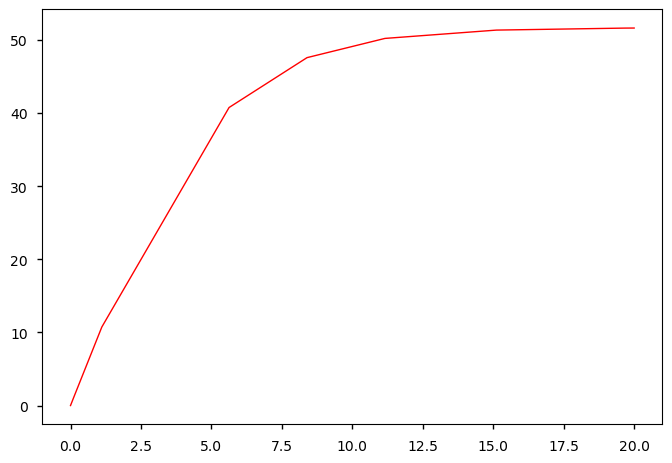

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

v0 = 0
sol = solve_ivp(quedalivre_edo, y0 = [v0], t_span = [0,20])

print(sol)
velocidade = sol.y[0]
tempo = sol.t
plt.plot(tempo, velocidade, 'r', lw=1)

### Solução analítica

Observe que é possível obter uma solução analítica para a EDO anterior, ou seja, encontrar uma função do tipo:

$
v(t) = f(t)
$

Utilizando a técnica, por exemplo, de separação de variáveis, podemos reescrever a EDO acima como:

$
\dfrac{dv}{1 - \left(\dfrac{v}{v_t}\right)^2} = g \cdot dt
$

onde $v_t = \sqrt{\frac{mg}{c_d}}$ o que, após integrarmos ambos os lados da equação, obtemos a solução:

$
v(t) = \sqrt{\dfrac{gm}{c_d}} \cdot \tanh \left(\sqrt{\dfrac{gc_d}{m}} \cdot t \right)
$

Text(0, 0.5, 'Velocidade')

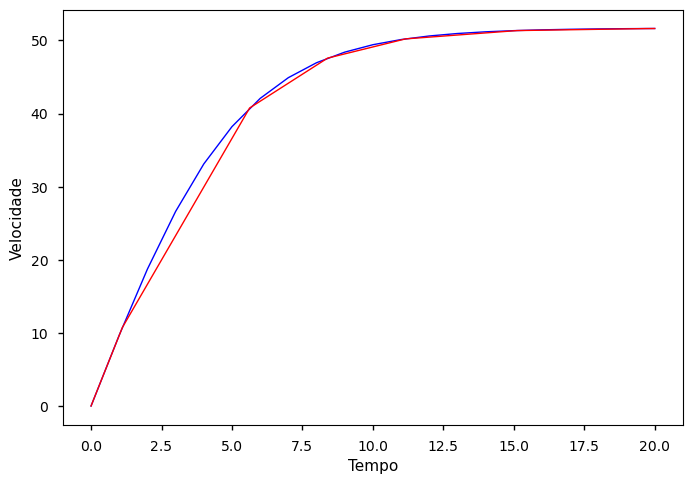

In [220]:
def quedalivre_analitico(t):
    g = 9.81
    cd = 0.25
    m = 68.1
    v = np.sqrt(g*m/cd)*np.tanh(np.sqrt(g*cd/m)*t)
    return v

treal = np.linspace(0, 20, 21)
vreal = quedalivre_analitico(treal)

# podemos comparar a solucao numerica obtida anteriormente com a solucao analitica:
plt.plot(treal, vreal, '-b', tempo , velocidade, '-r', lw=1)
plt.xlabel('Tempo')
plt.ylabel('Velocidade')

Text(0, 0.5, 'Velocidade')

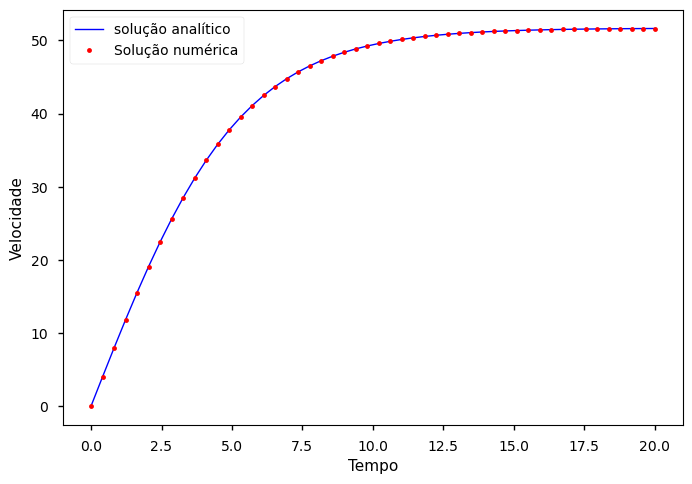

In [252]:
# vamos amostrar a solução numérica nos mesmos pontos que a solução analítica:

sol_scipy = solve_ivp(quedalivre_edo, y0 = [v0], t_span = [0,20], t_eval = treal)
tempo = sol_scipy.t
velocidade = sol_scipy.y[0]

plt.plot(treal, vreal, '-b', tempo , velocidade, '.r', lw=1)
plt.legend(['solução analítico', 'Solução numérica'])
plt.xlabel('Tempo')
plt.ylabel('Velocidade')

<a id=CHAPRA>[CHAPRA] CHAPRA, S. C. *Métodos Numéricos Aplicados com MATLAB para Engenheiros e Cientistas*, 3ª ed. 2013</a>